In [1]:
# first run this to resolve path issue/keyerror-equity
def load_equity_csv(path):
    df = pd.read_csv(path)
    # Standardize the column name
    if "equity" not in df.columns:
        if "portfolio_value" in df.columns:
            df.rename(columns={"portfolio_value": "equity"}, inplace=True)
        else:
            # fallback: assume the first column is equity
            first_col = df.columns[1] if len(df.columns) > 1 else df.columns[0]
            df.rename(columns={first_col: "equity"}, inplace=True)
    return df




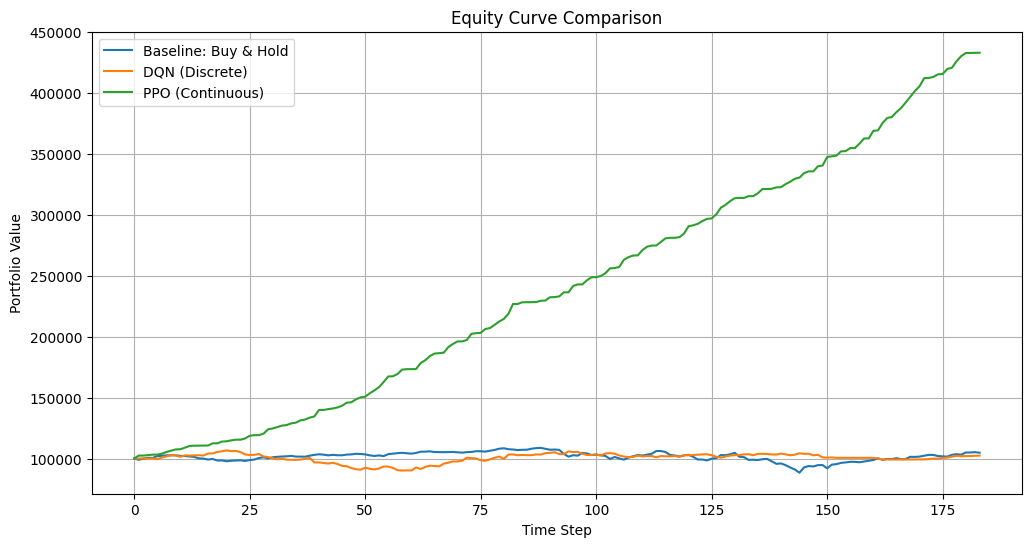

Comparison plot saved to E:/project\outputs\plots\compare_equity_curves.png

Strategy Performance Metrics:


,Baseline (Buy & Hold),DQN (Discrete),PPO (Continuous)
total_return_pct,36.553796,2.438890,333.293149
CAGR_pct,6.618832,3.355196,644.927891
volatility_ann_pct,21.628665,14.700559,12.257765
sharpe,0.306021,0.228236,52.613824
max_drawdown_pct,-37.086170,-15.477903,-0.020783
calmar,0.178472,0.216773,31031.117521
sortino,0.362873,0.335159,5409.848446
n_days,1225.000000,184.000000,184.000000


Comparison metrics saved to E:/project\outputs\evaluations\compare_strategies_metrics.csv
Comparison metrics saved to E:/project\outputs\evaluations\compare_strategies_metrics.json


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# ---------- Paths ----------
PROJECT_ROOT = r"E:/project"
EVAL_PATH = os.path.join(PROJECT_ROOT, "outputs", "evaluations")
PLOT_PATH = os.path.join(PROJECT_ROOT, "outputs", "plots")

BASELINE_CSV = os.path.join(EVAL_PATH, "baseline_buy_and_hold_equity_test.csv")
DQN_CSV = os.path.join(EVAL_PATH, "dqn_discrete_equity_test.csv")
PPO_CSV = os.path.join(EVAL_PATH, "ppo_continuous_equity_test.csv")

baseline_json = os.path.join(EVAL_PATH, "baseline_buy_and_hold_metrics_test.json")
dqn_json = os.path.join(EVAL_PATH, "dqn_discrete_metrics_test.json")
ppo_json = os.path.join(EVAL_PATH, "ppo_continuous_metrics_test.json")

# ---------- Load equity curves ----------
baseline = load_equity_csv(BASELINE_CSV)
dqn = load_equity_csv(DQN_CSV)
ppo = load_equity_csv(PPO_CSV)

# Align lengths (so plotting is fair)
min_len = min(len(baseline), len(dqn), len(ppo))
baseline, dqn, ppo = baseline[:min_len], dqn[:min_len], ppo[:min_len]

# ---------- Plot Comparison ----------
plt.figure(figsize=(12, 6))
plt.plot(baseline["equity"], label="Baseline: Buy & Hold")
plt.plot(dqn["equity"], label="DQN (Discrete)")
plt.plot(ppo["equity"], label="PPO (Continuous)")

plt.title("Equity Curve Comparison")
plt.xlabel("Time Step")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)

plot_file = os.path.join(PLOT_PATH, "compare_equity_curves.png")
plt.savefig(plot_file)
plt.show()
print(f"Comparison plot saved to {plot_file}")

# ---------- Load metrics ----------
def load_metrics(file):
    with open(file, "r") as f:
        return json.load(f)

baseline_metrics = load_metrics(baseline_json)
dqn_metrics = load_metrics(dqn_json)
ppo_metrics = load_metrics(ppo_json)

# ---------- Print Comparison ----------
print("\nStrategy Performance Metrics:")
df = pd.DataFrame({
    "Baseline (Buy & Hold)": baseline_metrics,
    "DQN (Discrete)": dqn_metrics,
    "PPO (Continuous)": ppo_metrics
})
display(df)

# Save metrics to CSV
metrics_csv = os.path.join(EVAL_PATH, "compare_strategies_metrics.csv")
df.to_csv(metrics_csv, index=True)
print(f"Comparison metrics saved to {metrics_csv}")

# Save metrics to JSON
metrics_json = os.path.join(EVAL_PATH, "compare_strategies_metrics.json")
with open(metrics_json, "w") as f:
    json.dump({
        "Baseline (Buy & Hold)": baseline_metrics,
        "DQN (Discrete)": dqn_metrics,
        "PPO (Continuous)": ppo_metrics
    }, f, indent=4)
print(f"Comparison metrics saved to {metrics_json}")